In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving final extracted features dataset(2) - objects_file (2).csv to final extracted features dataset(2) - objects_file (2).csv


In [3]:
data = pd.read_csv('final extracted features dataset(2) - objects_file (2).csv')
data


,Object Id,Average Velocity,Average Delta Altitude,Max Velocity,Average Delta longitude,Average Delta latitude,Average Delta time,longitude traverse,latitude traverse,Altitude Traverse,Time taken
0,1,4673.661323,49114.5060,5356.075,85166.010,99393.105,30.60053,85166.010,99393.105,473.6020,30.60053
1,2,4799.599286,22395.9640,5104.498,153211.624,164707.278,51.00083,68045.197,65324.849,496.9070,20.40030
2,3,4712.085519,37293.3714,5251.579,159104.508,138886.762,46.92074,91083.064,73555.966,1705.8324,26.52044
3,4,4468.894174,28139.5784,4859.402,159236.982,140032.864,48.96079,68126.626,66483.902,319.1520,22.44035
4,5,4743.935040,31669.7000,5174.293,146887.150,143204.636,46.92074,78744.085,76733.228,80.2350,24.48039
...,...,...,...,...,...,...,...,...,...,...,...
5020,5021,123.281818,5956.0000,149.000,57955.000,50463.000,1439.00000,46242.000,39869.000,5898.0000,500.00000
5021,5022,165.619469,11858.0000,242.000,82774.000,118655.000,1013.00000,31392.000,78272.000,5929.0000,513.00000
5022,5023,126.590164,9060.0000,169.000,71073.000,70782.000,788.00000,10450.000,32266.000,3259.0000,275.00000
5023,5024,163.555556,8809.0000,229.000,80974.000,157627.000,848.00000,33442.000,85456.000,5392.0000,573.00000


In [4]:
kmeans = KMeans(3, max_iter=100)
kmeans.fit(data[['Average Delta Altitude', 'longitude traverse', 'latitude traverse']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
identified_clusters = kmeans.fit_predict(data[['Average Delta Altitude', 'longitude traverse', 'latitude traverse']])
identified_clusters

array([1, 2, 1, ..., 0, 2, 2], dtype=int32)

In [ ]:
## to check false clustering
false = 0
for i in range(len(identified_clusters)):
  print(identified_clusters[i])
  if (i < 2002 and identified_clusters[i] != 2):
    false+=1
  if (i >= 2002 and i <= 3500 and identified_clusters[i] != 1):
    false+=1
  if (i > 3500 and identified_clusters[i] != 0):
    false+=1

print("false count : " , false)


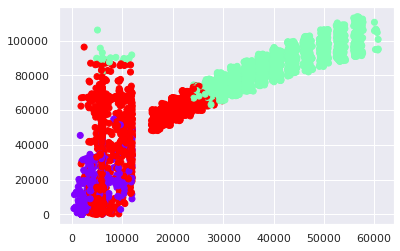

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Average Delta Altitude'],data_with_clusters['longitude traverse'],c=data_with_clusters['Clusters'],cmap='rainbow')

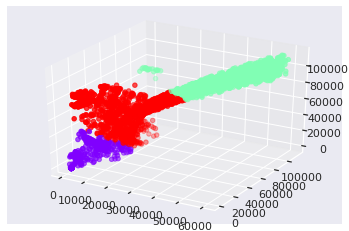

In [9]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
#zline = np.linspace(0, 15, 1000)
#xline = np.sin(zline)
#yline = np.cos(zline)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(data_with_clusters['Average Delta Altitude'], data_with_clusters['longitude traverse'], data_with_clusters['latitude traverse'], c=data_with_clusters['Clusters'], cmap='rainbow');